# Practical: Measuring the Time Complexity of a Program
## Scaling of the Program
In this practical, we will demonstrate the scaling of the program with respect to the number of elements in the input list. 

We will run the program for different input sizes and measure the time taken by the program to execute. 

We will then plot the time taken by the program against the number of elements in the input list. 

We will also fit a curve to the data points to see how the time taken by the program scales with the number of elements in the input list.



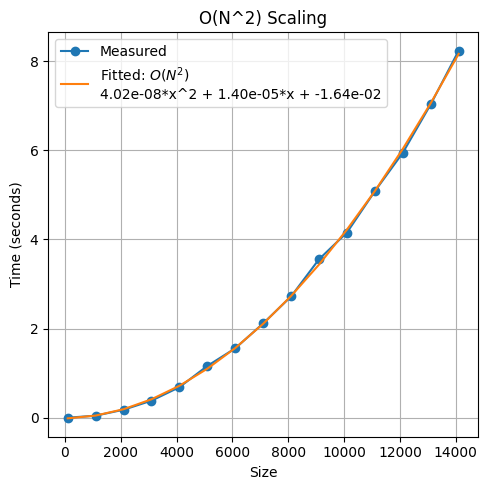

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Example of O(N^2) scaling with a nested loop
sizes = np.arange(100, 15000, 1000)
times = []

for size in sizes:
    start_time = time.time()
    for i in range(size):
        for j in range(size):
            pass  # Simulate some work
    end_time = time.time()
    times.append(end_time - start_time)

# Fit the results to a quadratic function
coefficients = np.polyfit(sizes, times, 2)
fit = np.poly1d(coefficients)

# Plot the results
plt.figure(figsize=(5, 5))
plt.plot(sizes, times, marker='o', label='Measured')
plt.plot(sizes, fit(sizes), label=f'Fitted: $O(N^2)$\n{coefficients[0]:.2e}*x^2 + {coefficients[1]:.2e}*x + {coefficients[2]:.2e}')
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('O(N^2) Scaling')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

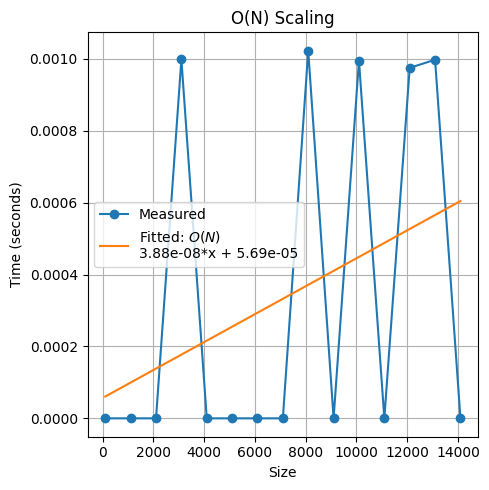

In [2]:
# Example of O(N) scaling with a single loop
sizes_linear = np.arange(100, 15000, 1000)
times_linear = []

for size in sizes_linear:
    start_time = time.time()
    for i in range(size):
        pass  # Simulate some work
    end_time = time.time()
    times_linear.append(end_time - start_time)

# Fit the results to a linear function
coefficients_linear = np.polyfit(sizes_linear, times_linear, 1)
fit_linear = np.poly1d(coefficients_linear)

# Plot the results
plt.figure(figsize=(5, 5))
plt.plot(sizes_linear, times_linear, marker='o', label='Measured')
plt.plot(sizes_linear, fit_linear(sizes_linear), label=f'Fitted: $O(N)$\n{coefficients_linear[0]:.2e}*x + {coefficients_linear[1]:.2e}')
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('O(N) Scaling')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

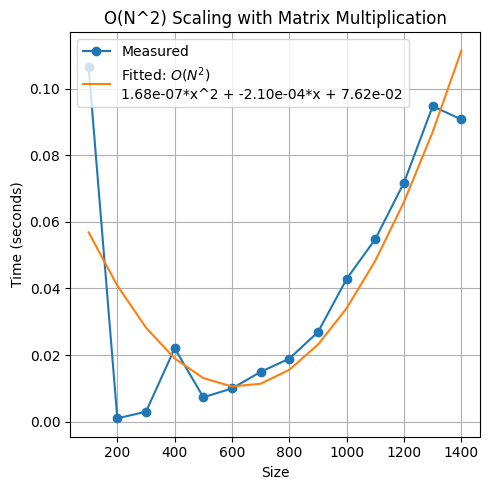

In [3]:
# Example of O(N^2) scaling with matrix multiplication
sizes_matrix = np.arange(100, 1500, 100)
times_matrix = []

for size in sizes_matrix:
    start_time = time.time()
    A = np.random.random((size, size))
    B = np.random.random((size, size))
    np.dot(A, B)
    end_time = time.time()
    times_matrix.append(end_time - start_time)

# Fit the results to a quadratic function
coefficients_matrix = np.polyfit(sizes_matrix, times_matrix, 2)
fit_matrix = np.poly1d(coefficients_matrix)

# Plot the results
plt.figure(figsize=(5, 5))
plt.plot(sizes_matrix, times_matrix, marker='o', label='Measured')
plt.plot(sizes_matrix, fit_matrix(sizes_matrix), label=f'Fitted: $O(N^2)$\n{coefficients_matrix[0]:.2e}*x^2 + {coefficients_matrix[1]:.2e}*x + {coefficients_matrix[2]:.2e}')
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('O(N^2) Scaling with Matrix Multiplication')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Measuring the Time Taken by the Program
We can use the `time` module to measure the time taken by the program to execute, and then use line profiling to identify the bottlenecks in the program.

In [5]:
!pip install line_profiler 
# Run this if you haven't installed the line_profiler package

In [6]:
import numpy as np
import time

%load_ext line_profiler

def matrix_multiplication_scaling():
    sizes_matrix = np.arange(100, 1500, 100)
    times_matrix = []

    for size in sizes_matrix:
        start_time = time.time()
        A = np.random.random((size, size))
        B = np.random.random((size, size))
        np.dot(A, B)
        end_time = time.time()
        times_matrix.append(end_time - start_time)

    # Fit the results to a quadratic function
    coefficients_matrix = np.polyfit(sizes_matrix, times_matrix, 2)
    fit_matrix = np.poly1d(coefficients_matrix)


# Measure the time taken by the function
start_time = time.time()
matrix_multiplication_scaling()
end_time = time.time()
print(f"Time taken by the function: {end_time - start_time} seconds")

# use profiler to measure the time taken by each line of the function
%lprun -f matrix_multiplication_scaling matrix_multiplication_scaling()

Time taken by the function: 0.43640661239624023 seconds


Timer unit: 1e-07 s

Total time: 0.432619 s
File: C:\Users\a\AppData\Local\Temp\ipykernel_23044\96732940.py
Function: matrix_multiplication_scaling at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def matrix_multiplication_scaling():
     7         1        135.0    135.0      0.0      sizes_matrix = np.arange(100, 1500, 100)
     8         1          6.0      6.0      0.0      times_matrix = []
     9                                           
    10        15        578.0     38.5      0.0      for size in sizes_matrix:
    11        14        101.0      7.2      0.0          start_time = time.time()
    12        14     879919.0  62851.4     20.3          A = np.random.random((size, size))
    13        14     873992.0  62428.0     20.2          B = np.random.random((size, size))
    14        14    2566591.0 183327.9     59.3          np.dot(A, B)
    15        14        563.0     40.2      0.0          end_t